# Example Usage

In [1]:
import chalc as ch
import numpy as np
import matplotlib.pyplot as plt

For our data we sample 100 points on a circle with some noise and 100 points from inside the unit disk.

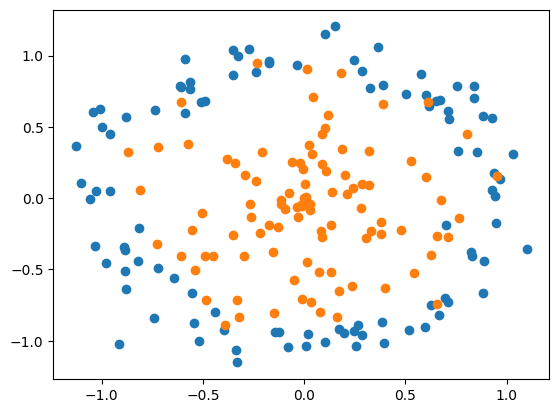

In [2]:
np.random.seed(40)
num_points = 100
mean = [0, 0]
cov = np.eye(2)*0.01
x = np.array([[np.sin(2*np.pi*t), np.cos(2*np.pi*t)] for t in np.random.rand(num_points)]).T +\
    np.random.default_rng().multivariate_normal(mean, cov, num_points).T # points as columns
y = np.random.rand(num_points) * np.array([[np.sin(2*np.pi*t), np.cos(2*np.pi*t)] for t in np.random.rand(num_points)]).T
plt.scatter(x[0, :], x[1, :])
plt.scatter(y[0, :], y[1, :])

We compute the chromatic alpha complex of the point cloud:

In [3]:
colours = [0]*100 + [1]*100
points = np.concatenate((x,y), axis=1)
K = ch.chromatic.chromatic_alpha_complex(points, colours)

$K$ has far fewer simplices than either the Cech or Vietoris-Rips complex, which each have $\displaystyle \binom{200}{2} = 19900$ edges and $\displaystyle \binom{200}{3} = 1313400$ 2-simplices. 

In [5]:
print(str(K.count_simplices_in_dim(1)) + ' 1-simplices')
print(str(K.count_simplices_in_dim(2)) + ' 2-simplices')

947 1-simplices
1298 2-simplices
